In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
hitters = pd.read_csv("Assignment_3_Hitters.csv")

## Data Preprocessing & Cleaning
We want to fill in missing salary data instead of just dropping the missing data rows. One way to do this is by filling in the mean salary (imputation).
However we can be smarter about this and check the average sal by NewLeague. For example:


Avg salaries in the NewLeague A is slightly higher than Avg salaries in the NewLeague N

In [3]:
print(round(hitters[["Salary","NewLeague"]][hitters["NewLeague"] =="A"].mean()))

Salary    537.0
dtype: float64


In [4]:
print(round(hitters[["Salary","NewLeague"]][hitters["NewLeague"] =="N"].mean()))

Salary    535.0
dtype: float64


<AxesSubplot:>

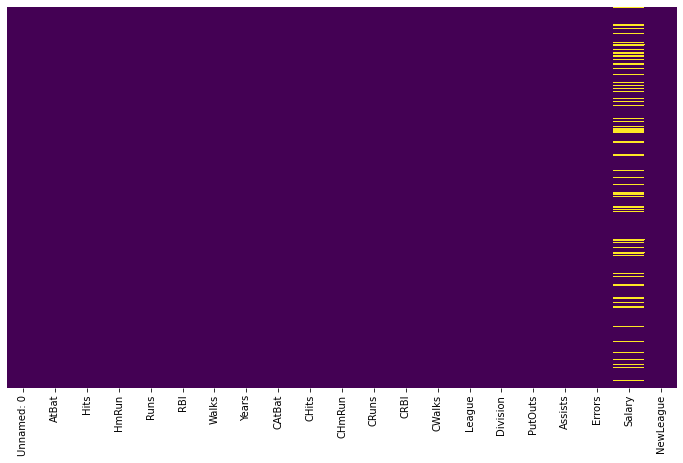

In [5]:
# Heatmap to check for the missing values
plt.figure(figsize=(12, 7))
sns.heatmap(hitters.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [6]:
def impute_sal(cols):
    
    sal = cols[0]
    league = cols[1]
        
    if pd.isnull(sal):

        if league == "A":
            return 537

        else:
            return 535

    else:
        return sal

In [7]:
hitters['Salary'] = hitters[['Salary','NewLeague']].apply(impute_sal,axis=1)

Now let's check that heat map again!

<AxesSubplot:>

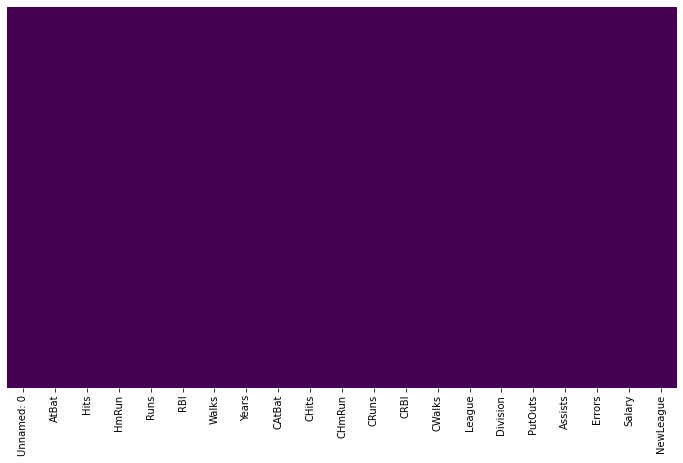

In [8]:
plt.figure(figsize=(12, 7))
sns.heatmap(hitters.isnull(),yticklabels=False,cbar=False,cmap='viridis')

## Converting Categorical Features 

We'll need to convert categorical features to dummy variables using pandas! Otherwise our machine learning algorithm won't be able to directly take in those features as inputs.

In [9]:
hitters.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 322 entries, 0 to 321
Data columns (total 21 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  322 non-null    object 
 1   AtBat       322 non-null    int64  
 2   Hits        322 non-null    int64  
 3   HmRun       322 non-null    int64  
 4   Runs        322 non-null    int64  
 5   RBI         322 non-null    int64  
 6   Walks       322 non-null    int64  
 7   Years       322 non-null    int64  
 8   CAtBat      322 non-null    int64  
 9   CHits       322 non-null    int64  
 10  CHmRun      322 non-null    int64  
 11  CRuns       322 non-null    int64  
 12  CRBI        322 non-null    int64  
 13  CWalks      322 non-null    int64  
 14  League      322 non-null    object 
 15  Division    322 non-null    object 
 16  PutOuts     322 non-null    int64  
 17  Assists     322 non-null    int64  
 18  Errors      322 non-null    int64  
 19  Salary      322 non-null    f

In [10]:
league = pd.get_dummies(hitters['League'],drop_first=True)
division = pd.get_dummies(hitters['Division'],drop_first=True)

In [11]:
hitters.drop(['League','Division','Unnamed: 0'],axis=1,inplace=True)

In [12]:
hitters = pd.concat([hitters,league,division],axis=1)

In [13]:
X = hitters.drop(["Salary","NewLeague"],axis=1)
y = hitters['Salary']

In [14]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

In [15]:
X = np.array(X)
y = np.array(y)

## Train Test Split

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [18]:
# Initialize the weights and bias randomly
def initialize_parameters(X):
    b = np.random.rand()
    w = np.random.rand(X.shape[1],1)
    return w, b

In [19]:
def model(X, y, lr, iterations, lamb, regular):
    
    costs = []

    counter = 0
    n = len(X)
    w, b = initialize_parameters(X)
    
   
    while iterations > counter:
        
        
        z = np.dot(w.T, X.T) + b
        
        if z.all() >= 0:
            pred = z
            
        else:
            pred = z * 0.05
            
        #Calculate Loss Function
        MSE = np.square(np.subtract(y, pred)).mean()
        
        if regular == 'L1':
            
            cost = MSE + (lamb * abs(np.sum((w))))
            dw = 1/n * (np.dot(X.T, (pred - y).T) + lamb)
            db = 1/n* np.sum(pred - y)

            w = w - lr * dw
            b = b - lr * db
            
        elif regular == 'L2':
            cost = MSE + ((lamb / 2) * (np.sum((w)**2)))
            
            dw = 1/n * (np.dot(X.T, (pred - y).T) + lamb)
            db = 1/n* np.sum(pred - y)

            w = w - lr * dw
            b = b - lr * db
            
        else:
            cost = MSE
            dw = 1/n * np.dot(X.T, (pred - y).T)
            db = 1/n* np.sum(pred - y)

            w = w - lr * dw
            b = b - lr * db
            
        if counter % 10 == 0:
            costs.append(cost)
            
                
        counter+= 1
            
    return w, b, costs

In [20]:
def plot(cost, dataset):
    plt.figure(figsize = (15,7))
    sns.lineplot(x = list(range(0,len(cost))), y = cost)
    plt.title("MSE - "+ dataset)
    plt.xlabel("# of iterations")
    plt.ylabel("MSE")
    plt.show()

Text(0.5, 1.0, 'L1 Regulization and lamda = 0.01')

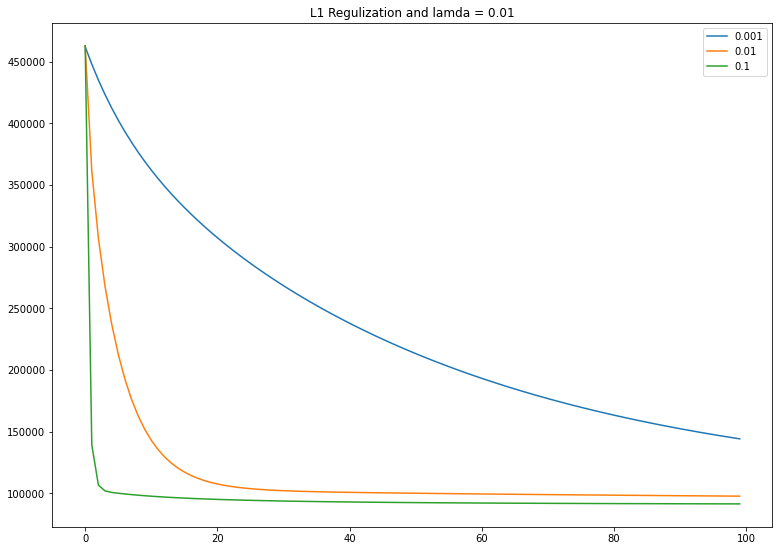

In [21]:
cost_lr1 = []
w, b, cost_lr1 = model(X_train, y_train, lr = 0.001, iterations = 1000, lamb = 0.01, regular = "L1")

cost_lr2 = []
w, b, cost_lr2 = model(X_train, y_train, lr = 0.01, iterations = 1000, lamb = 0.01, regular = "L1")

cost_lr3 = []
w, b, cost_lr3 = model(X_train, y_train, lr = 0.1, iterations = 1000, lamb = 0.01, regular = "L1")

fig = plt.figure(figsize = (10,7))

ax = fig.add_axes([0,0,1,1])

ax.plot(list(range(0,len(cost_lr1))), cost_lr1, label="0.001")
ax.plot(list(range(0,len(cost_lr2))), cost_lr2, label="0.01")
ax.plot(list(range(0,len(cost_lr3))), cost_lr3, label="0.1")
ax.legend()
ax.set_title("L1 Regulization and lamda = 0.01")



Text(0.5, 1.0, 'L1 Regulization and lamda = 10')

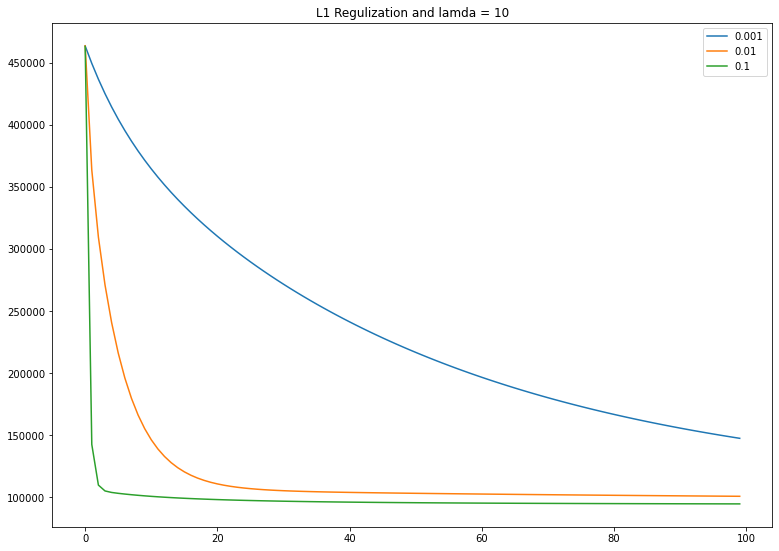

In [22]:

cost1 = []
w, b, cost1 = model(X_train, y_train, lr = 0.001, iterations = 1000, lamb = 10, regular = "L1")

cost2 = []
w, b, cost2 = model(X_train, y_train, lr = 0.01, iterations = 1000, lamb = 10, regular = "L1")

cost3 = []
w, b, cost3 = model(X_train, y_train, lr = 0.1, iterations = 1000, lamb = 10, regular = "L1")


fig = plt.figure(figsize = (10,7))

ax = fig.add_axes([0,0,1,1])

ax.plot(list(range(0,len(cost1))), cost1, label="0.001")
ax.plot(list(range(0,len(cost2))), cost2, label="0.01")
ax.plot(list(range(0,len(cost3))), cost3, label="0.1")
ax.legend()
ax.set_title("L1 Regulization and lamda = 10")



# Question b

Text(0.5, 1.0, 'MSE + Regulization and lamda = 0.01')

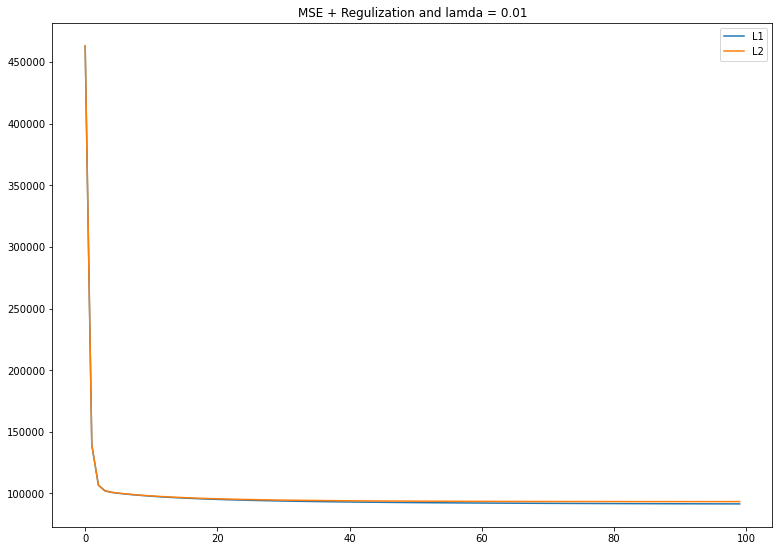

In [23]:
w, b, cost_l1 = model(X_train, y_train, lr = 0.1, iterations = 1000, lamb = 0.01, regular = "L1")
w, b, cost_l2 = model(X_train, y_train, lr = 0.1, iterations = 1000, lamb = 0.01, regular = "L2")

fig = plt.figure(figsize = (10,7))

ax = fig.add_axes([0,0,1,1])

ax.plot(list(range(0,len(cost_l1))), cost_l1, label="L1")
ax.plot(list(range(0,len(cost_l2))), cost_l2, label="L2")

ax.legend()
ax.set_title("MSE + Regulization and lamda = 0.01")



Text(0.5, 1.0, 'MSE + Regulization and lamda = 10')

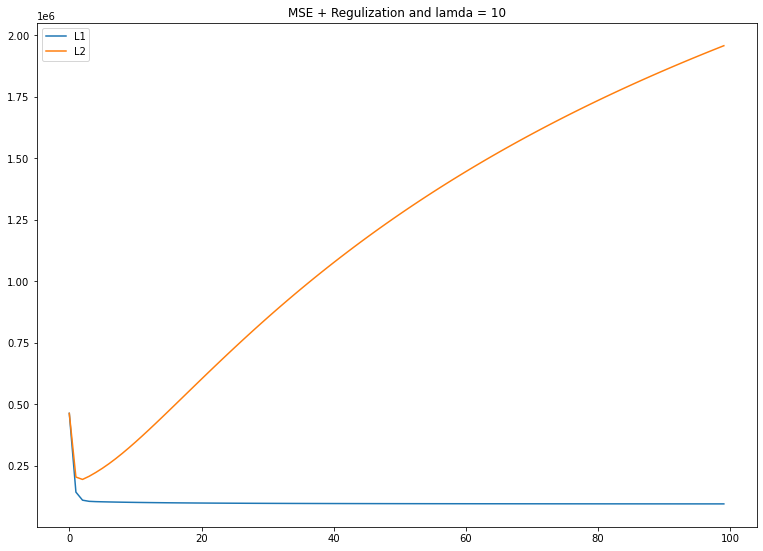

In [24]:
w, b, cost_l10 = model(X_train, y_train, lr = 0.1, iterations = 1000, lamb = 10, regular = "L1")
w, b, cost_l20 = model(X_train, y_train, lr = 0.1, iterations = 1000, lamb = 10, regular = "L2")

fig = plt.figure(figsize = (10,7))

ax = fig.add_axes([0,0,1,1])

ax.plot(list(range(0,len(cost_l10))), cost_l10, label="L1")
ax.plot(list(range(0,len(cost_l20))), cost_l20, label="L2")

ax.legend()
ax.set_title("MSE + Regulization and lamda = 10")


# Question c

In [30]:
w, b, cost = model(X_train, y_train, lr = 0.1, iterations = 1000, lamb = 0.01, regular = " ")
print(w)
print(b)

[[-343.15973279]
 [ 277.5775284 ]
 [  40.83031855]
 [  21.84520716]
 [  12.93811884]
 [ 108.80121632]
 [ -69.87977358]
 [-143.9329687 ]
 [ 110.66963903]
 [ -15.17880344]
 [ 278.28105077]
 [ 132.61631644]
 [-148.84750659]
 [  72.21145126]
 [  50.0079578 ]
 [ -23.23434862]
 [  19.16740063]
 [ -51.44894543]]
536.8780465801783


In [31]:
w1, b, cost = model(X_train, y_train, lr = 0.1, iterations = 1000, lamb = 0.01, regular = "L2")
print(w1)
print(b)

[[-343.13394452]
 [ 277.54560912]
 [  40.83554999]
 [  21.86594244]
 [  12.92606202]
 [ 108.79484642]
 [ -69.90078774]
 [-143.80468858]
 [ 110.55023864]
 [ -15.23844484]
 [ 278.22860184]
 [ 132.72449526]
 [-148.83693451]
 [  72.21133605]
 [  50.00371497]
 [ -23.23524857]
 [  19.1654448 ]
 [ -51.45127244]]
536.8782078227231


In [32]:
w1, b, cost = model(X_train, y_train, lr = 0.1, iterations = 1000, lamb = 10, regular = "L2")
print(w1)
print(b)

[[-343.06163154]
 [ 277.51895133]
 [  40.80932971]
 [  21.79801621]
 [  12.93033854]
 [ 108.80174349]
 [ -70.00978535]
 [-143.64675895]
 [ 110.22271425]
 [ -15.41281822]
 [ 278.38393118]
 [ 132.99586313]
 [-148.87432205]
 [  72.17677675]
 [  49.95923573]
 [ -23.25411641]
 [  19.11255317]
 [ -51.49663071]]
536.8777037507759


In [33]:
w1, b, cost = model(X_train, y_train, lr = 0.1, iterations = 1000, lamb = 0.01, regular = "L1")
print(w1)
print(b)

[[-343.18957855]
 [ 277.61266476]
 [  40.83301917]
 [  21.8420923 ]
 [  12.93282661]
 [ 108.80414032]
 [ -69.89763312]
 [-143.78063732]
 [ 110.5688946 ]
 [ -15.18004255]
 [ 278.24648291]
 [ 132.61699227]
 [-148.84835891]
 [  72.21183694]
 [  50.00439025]
 [ -23.23304799]
 [  19.16611698]
 [ -51.44943597]]
536.8781793876768


In [34]:
w2, b, cost = model(X_train, y_train, lr = 0.1, iterations = 1000, lamb = 10, regular = "L1")
print(w1)
print(b)

[[-343.18957855]
 [ 277.61266476]
 [  40.83301917]
 [  21.8420923 ]
 [  12.93282661]
 [ 108.80414032]
 [ -69.89763312]
 [-143.78063732]
 [ 110.5688946 ]
 [ -15.18004255]
 [ 278.24648291]
 [ 132.61699227]
 [-148.84835891]
 [  72.21183694]
 [  50.00439025]
 [ -23.23304799]
 [  19.16611698]
 [ -51.44943597]]
536.8775848161747
